In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *

In [4]:
compounds, water = load_compounds()
exp_params = load_experiments(['bd_wet', 'bd_dry', 'bd_nacl_low', 'bd_nacl_high','bd_na2so4_low', 'bd_na2so4_high'])
constants = load_constants()
paths = load_paths()
exp_params

{'bd_wet': {'raw_data_file': '190918-butenedial-droplets.csv',
  'composition': {'PEG-6': 0.2, 'Butenedial': 0.075},
  'solution_name': 'bd10hg20_002',
  'idx_range': [16, 500],
  'bad_idx': None,
  'trap_time': [2, 300],
  'other_query': '(rh>50 or trapped<5) and comp=="bd10hg20_002"',
  'y_col': 'mz85_mz283',
  'p283_cutoff': 1000,
  'columns_to_keep': ['trapped', 'comp', 'experiment', 'mz85_mz283'],
  'number_of_steps': 3000.0,
  'r_init': 1.29e-05,
  'T': 300.1,
  'RH': 0.75,
  'x_water': 0.795,
  'value_idx': 0,
  'norm_idx': 1,
  'cal_data_time': 5,
  'label': 'BD (wet)'},
 'bd_dry': {'raw_data_file': '190918-butenedial-droplets.csv',
  'composition': {'Butenedial': 0.075, 'PEG-6': 0.2},
  'solution_name': 'bd10hg20_008',
  'idx_range': [63, 500],
  'bad_idx': [113],
  'trap_time': [2, 50],
  'other_query': 'rh<20 and comp=="bd10hg20_008"',
  'y_col': 'mz85_mz283',
  'p283_cutoff': 1000,
  'columns_to_keep': ['trapped', 'comp', 'experiment', 'mz85_mz283'],
  'number_of_steps': 30

In [5]:
cmpds_to_select = ['hexaethylene_glycol','butenedial']
compounds = { cmpd: compounds[cmpd] for cmpd in cmpds_to_select }
compounds

{'hexaethylene_glycol': {'name': 'PEG-6',
  'D_g': 4.26e-06,
  'mw': 0.2823,
  'rho': 1180.0,
  'c_inf': 0,
  'vp': 0.000305,
  'vp_min': 0.000256,
  'vp_max': 0.000364,
  'T_vp': 298,
  'dH': 102100.0,
  'dH_min': 100600.0,
  'dH_max': 103600.0,
  'mz': 283},
 'butenedial': {'name': 'Butenedial',
  'D_g': 8.556e-06,
  'mw': 0.1201,
  'rho': 1060,
  'c_inf': 0,
  'vp': 0.0342,
  'T_vp': 298,
  'dH': 77100.0,
  'dH_max': 77500.0,
  'dH_min': 76700.0,
  'mz': 85}}

In [6]:
exp_params['bd_wet']

{'raw_data_file': '190918-butenedial-droplets.csv',
 'composition': {'PEG-6': 0.2, 'Butenedial': 0.075},
 'solution_name': 'bd10hg20_002',
 'idx_range': [16, 500],
 'bad_idx': None,
 'trap_time': [2, 300],
 'other_query': '(rh>50 or trapped<5) and comp=="bd10hg20_002"',
 'y_col': 'mz85_mz283',
 'p283_cutoff': 1000,
 'columns_to_keep': ['trapped', 'comp', 'experiment', 'mz85_mz283'],
 'number_of_steps': 3000.0,
 'r_init': 1.29e-05,
 'T': 300.1,
 'RH': 0.75,
 'x_water': 0.795,
 'value_idx': 0,
 'norm_idx': 1,
 'cal_data_time': 5,
 'label': 'BD (wet)'}

In [7]:
from src.d03_modeling.evaporate import evaporate
df_model = evaporate(compounds, water, params=exp_params['bd_wet'])

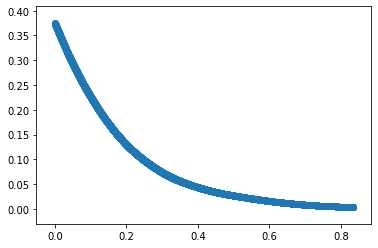

In [8]:
df_model.head()

plt.scatter(df_model.secs/3600, df_model['n_butenedial']/df_model['n_hexaethylene_glycol'])